In [61]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

df_interest = pd.read_csv('https://cocl.us/datascience_survey_data', index_col = 0)
df_interest.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
print('ready')

ready


In [59]:
# 1. Sort the dataframe in descending order of Very interested.
df_interest.sort_values('Very interested', ascending=False)  

,Unnamed: 0,Very interested,Somewhat interested,Not interested
1,Data Analysis / Statistics,1688,444,60
5,Machine Learning,1629,477,74
3,Data Visualization,1340,734,102
0,Big Data (Spark / Hadoop),1332,729,127
4,Deep Learning,1263,770,136
2,Data Journalism,429,1081,610


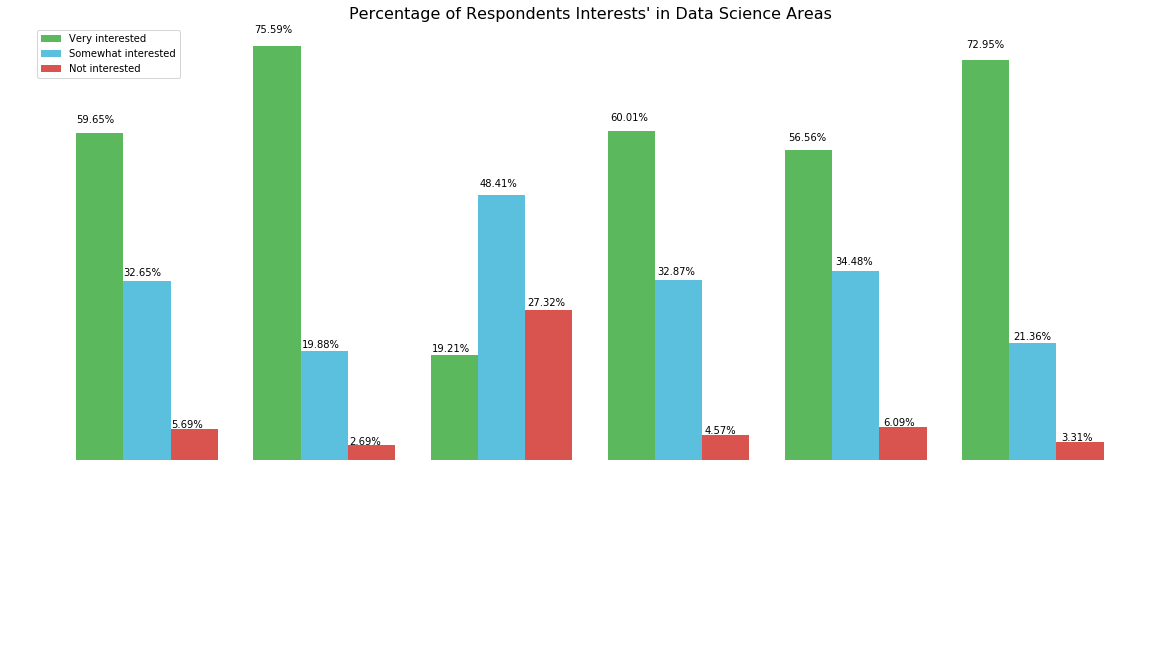

In [78]:
# 2. Convert the numbers into percentages of the total number of respondents.
df_interest_pct = ((df_interest / 2233) * 100).round(2)

ax = df_interest_pct.plot(kind='bar',
                       figsize = (20, 8),
                       width = 0.8,
                       color = ['#5cb85c', '#5bc0de', '#d9534f'],
                       fontsize = 14)

plt.title('Percentage of Respondents Interests\''' in Data Science Areas', fontsize=16) 

#Percentages above
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.03))
    
#Without axis
plt.axis('off')
plt.show()
plt.close()

In [93]:
# Crime rate in San Francisco, California
df_sf = pd.read_csv('https://cocl.us/sanfran_crime_dataset')

In [94]:
df_sfcrime = df_sf.groupby(['PdDistrict']).count().reset_index() #Nuevo DF!
df_sfcrime.drop(['Category','Descript','DayOfWeek','Date','Time', 'Resolution','Address','X','Y','Location','PdId'], axis=1, inplace=True)
df_sfcrime.rename(columns={'PdDistrict':'Neighborhood', 'IncidntNum':'Count'}, inplace=True)
df_sfcrime

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [95]:
# download SF geojson file
!wget --quiet  https://cocl.us/sanfran_geojson.
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

In [ ]:
#For the map, make sure that:use the default threshold scale.

sf_geo = r'sanfran_geo.json' # geojson file

# create a plain sf map
sf_map = folium.Map(location=[37.77, -122.42], zoom_start=12, tiles='Mapbox Bright')


# generate choropleth map
sf_map.choropleth(
    geo_data=sf_geo,
    data=df_sfcrime,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Francisco Crime dataset'
)

# display map
sf_map

